In [111]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [112]:
from regression import Learner, sine_function

In [113]:
use_gpu = False
if use_gpu:
    device = 'cuda'
    os.environ["CUDA_VISIBLE_DEVICES"] = '0'
else:
    device = 'cpu'

In [114]:
amplitude = 4.8
phase = -np.pi

# range from -5 to 5
x_range = np.arange(-5, 5, 0.01)
y_range = [sine_function(amplitude, phase, xi) for xi in x_range]

# observation
x = [1.5, 2.2, 3.1, 3.8, 4.5]
# x = [1.1, 2.4, 3.0, 3.9, 4.6]
y = [sine_function(amplitude, phase, xi) for xi in x]

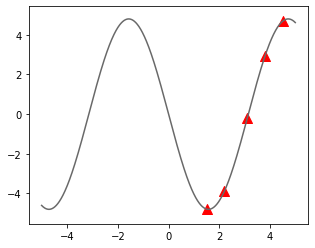

In [115]:
plt.figure(figsize=(5,4))
plt.plot(x_range, y_range, c='dimgray')
plt.scatter(x, y, c='red', s=100, marker='^')

In [116]:
reg_learner = Learner(hidden_size=40, device=device)
loadpath = "trained_models/reg_model_exp1.pt"
reg_learner.load_state_dict(torch.load(loadpath))
reg_learner.eval()

Learner()

In [117]:
lr_a = 0.01
mse_criterion = nn.MSELoss(reduction='mean')

In [118]:
X_input = torch.tensor(x_range, dtype=torch.float).to(device)
X_input = X_input.unsqueeze(-1)

X_observed = torch.tensor(x, dtype=torch.float).to(device)
X_observed = X_observed.unsqueeze(-1)

Y_observed = torch.tensor(y, dtype=torch.float).to(device)
Y_observed = Y_observed.unsqueeze(-1)

# pre-update Y_pred1
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

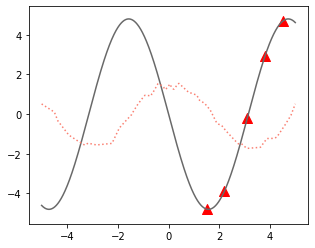

In [119]:
plt.figure(figsize=(5,4))
plt.plot(x_range, y_range, c='dimgray')
plt.plot(x_range, y_pred1, ls=':', c='salmon')
plt.scatter(x, y, c='red', s=100, marker='^')

In [120]:
optimizer = torch.optim.SGD(reg_learner.parameters(), lr=lr_a*0.8)
optimizer.zero_grad()

In [121]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(17.3944, grad_fn=<MseLossBackward>)


In [122]:
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(17.3944, grad_fn=<MseLossBackward>)
tensor(0.3907, grad_fn=<MseLossBackward>)
tensor(0.4802, grad_fn=<MseLossBackward>)
tensor(0.7657, grad_fn=<MseLossBackward>)
tensor(1.2399, grad_fn=<MseLossBackward>)
tensor(0.9860, grad_fn=<MseLossBackward>)
tensor(0.5989, grad_fn=<MseLossBackward>)
tensor(0.4306, grad_fn=<MseLossBackward>)
tensor(0.2549, grad_fn=<MseLossBackward>)
tensor(0.1780, grad_fn=<MseLossBackward>)


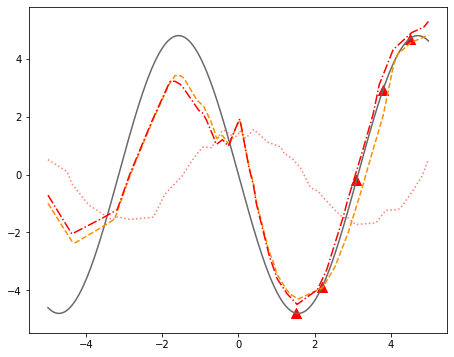

In [128]:
plt.figure(figsize=(7.5,6))
plt.plot(x_range, y_range, c='dimgray')
plt.plot(x_range, y_pred1, ls=':', c='salmon')
plt.plot(x_range, y_pred2, ls='--', c='darkorange')
plt.plot(x_range, y_pred3, ls='-.', c='red')
plt.scatter(x, y, c='red', s=100, marker='^')

## Pre-trained model for K=5

In [129]:
lr_a = 0.01
optimizer = torch.optim.SGD(reg_learner.parameters(), lr=lr_a)
optimizer.zero_grad()

In [130]:
loadpath = "trained_models/reg_6march_pretrain.pt"

# pre-update Y_pred1
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

In [131]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(15.9424, grad_fn=<MseLossBackward>)


In [132]:
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(15.9424, grad_fn=<MseLossBackward>)
tensor(10.6880, grad_fn=<MseLossBackward>)
tensor(5.4712, grad_fn=<MseLossBackward>)
tensor(4.0293, grad_fn=<MseLossBackward>)
tensor(3.8934, grad_fn=<MseLossBackward>)
tensor(3.7670, grad_fn=<MseLossBackward>)
tensor(3.6493, grad_fn=<MseLossBackward>)
tensor(3.5394, grad_fn=<MseLossBackward>)
tensor(3.4415, grad_fn=<MseLossBackward>)
tensor(3.3603, grad_fn=<MseLossBackward>)


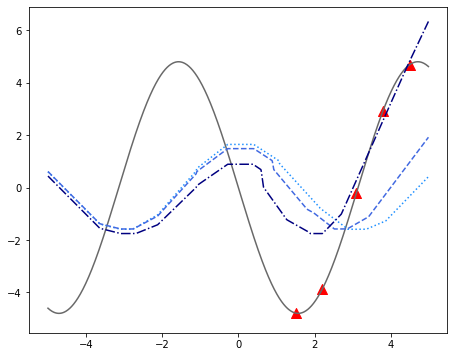

In [134]:
plt.figure(figsize=(7.5,6))
plt.plot(x_range, y_range, c='dimgray')
plt.plot(x_range, y_pred1, ls=':', c='dodgerblue')
plt.plot(x_range, y_pred2, ls='--', c='royalblue')
plt.plot(x_range, y_pred3, ls='-.', c='navy')
plt.scatter(x, y, c='red', s=100, marker='^')

## MAML K = 10

In [135]:
loadpath = "trained_models/reg_model_exp1.pt"

In [136]:
# observation
amplitude = 2.2
phase = -3

# range from -5 to 5
x_range = np.arange(-5, 5, 0.01)
y_range = [sine_function(amplitude, phase, xi) for xi in x_range]

x = [-4.3, -3.9, -2.9, -2.2, -2.1, -1, 0.1, 0.8, 1.5, 2.2]
y = [sine_function(amplitude, phase, xi) for xi in x]

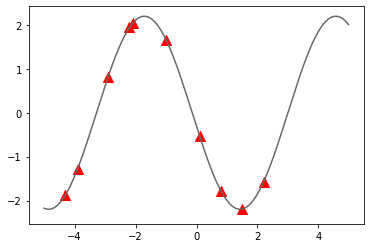

In [137]:
plt.plot(x_range, y_range, c='dimgray')
plt.scatter(x, y, c='red', s=100, marker='^')

In [138]:
X_input = torch.tensor(x_range, dtype=torch.float).to(device)
X_input = X_input.unsqueeze(-1)

X_observed = torch.tensor(x, dtype=torch.float).to(device)
X_observed = X_observed.unsqueeze(-1)

Y_observed = torch.tensor(y, dtype=torch.float).to(device)
Y_observed = Y_observed.unsqueeze(-1)

# pre-update Y_pred1
reg_learner.load_state_dict(torch.load(loadpath))
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

In [139]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(4.8977, grad_fn=<MseLossBackward>)


In [140]:
mse_error_maml = []
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_error_maml.append(mse_loss.item())
    mse_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(4.8977, grad_fn=<MseLossBackward>)
tensor(0.4053, grad_fn=<MseLossBackward>)
tensor(0.3022, grad_fn=<MseLossBackward>)
tensor(0.2372, grad_fn=<MseLossBackward>)
tensor(0.1993, grad_fn=<MseLossBackward>)
tensor(0.1706, grad_fn=<MseLossBackward>)
tensor(0.1471, grad_fn=<MseLossBackward>)
tensor(0.1277, grad_fn=<MseLossBackward>)
tensor(0.1111, grad_fn=<MseLossBackward>)
tensor(0.0970, grad_fn=<MseLossBackward>)


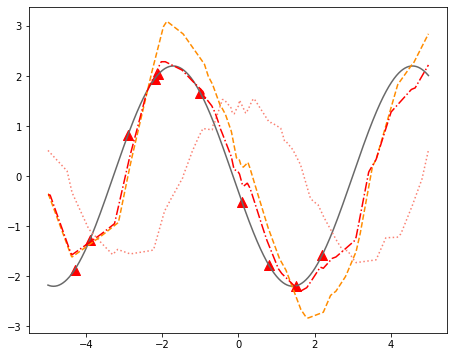

In [141]:
plt.figure(figsize=(7.5,6))
plt.plot(x_range, y_range, c='dimgray')
plt.plot(x_range, y_pred1, ls=':', c='salmon')
plt.plot(x_range, y_pred2, ls='--', c='darkorange')
plt.plot(x_range, y_pred3, ls='-.', c='red')
plt.scatter(x, y, c='red', s=100, marker='^')

In [142]:
loadpath = "trained_models/reg_6march_pretrain.pt"
lr_a = 0.02
optimizer = torch.optim.SGD(reg_learner.parameters(), lr=lr_a)
optimizer.zero_grad()
# pre-update Y_pred1
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

In [143]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(4.7793, grad_fn=<MseLossBackward>)


In [144]:
mse_error_pretrain = []
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath, map_location=torch.device('cpu')))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()
    mse_error_pretrain.append(mse_loss.item())
    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(4.7793, grad_fn=<MseLossBackward>)
tensor(3.9652, grad_fn=<MseLossBackward>)
tensor(3.1527, grad_fn=<MseLossBackward>)
tensor(2.5228, grad_fn=<MseLossBackward>)
tensor(1.9617, grad_fn=<MseLossBackward>)
tensor(1.7422, grad_fn=<MseLossBackward>)
tensor(1.6504, grad_fn=<MseLossBackward>)
tensor(1.5806, grad_fn=<MseLossBackward>)
tensor(1.5267, grad_fn=<MseLossBackward>)
tensor(1.4645, grad_fn=<MseLossBackward>)


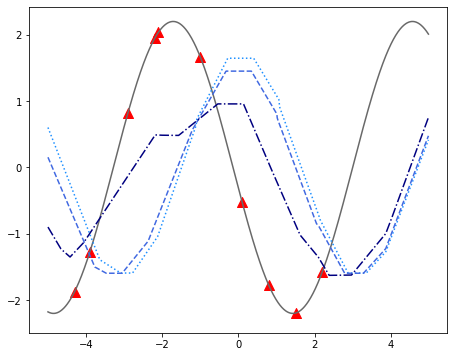

In [146]:
plt.figure(figsize=(7.5,6))
plt.plot(x_range, y_range, c='dimgray')
plt.plot(x_range, y_pred1, ls=':', c='dodgerblue')
plt.plot(x_range, y_pred2, ls='--', c='royalblue')
plt.plot(x_range, y_pred3, ls='-.', c='navy')
plt.scatter(x, y, c='red', s=100, marker='^')

# MSE Loss

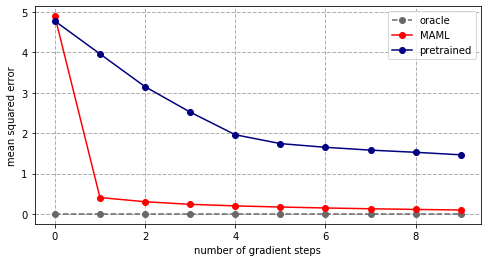

In [148]:
iter_x = [x for x in range(10)]
mse_error_oracle = [0 for _ in range(10)]
plt.figure(figsize=(8,4))
plt.plot(iter_x, mse_error_oracle, 'o--', c='dimgray', label='oracle')
plt.plot(iter_x, mse_error_maml, 'o-', c='red', label='MAML')
plt.plot(iter_x, mse_error_pretrain, 'o-', c='navy', label='pretrained')
plt.grid(linestyle='--', linewidth=1)
plt.xlabel("number of gradient steps")
plt.ylabel("mean squared error")
plt.legend()